In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image
import glob
import os
import matplotlib.pyplot as plt

In [2]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

	target_size=(n_size,n_size)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")

In [3]:
def load_data(img_path):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=n_size
    color=3
    # 이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    return imgs, labels

In [4]:
n_size = 28
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

# 혼자 진행하느라 웹캠 없는 사람을 위한 데이터로 진행하다가 너무 낮은 정확도로 인해 다른 그루님으로부터 데이터들을 공유받음

600  images to be resized.
600  images resized.
600  images to be resized.
600  images resized.
600  images to be resized.
600  images resized.


In [5]:
number_of_data = 1800
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

라벨:  0


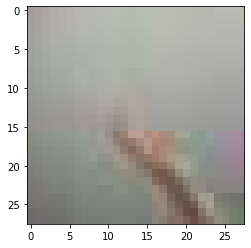

In [6]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

# 이미지와 라벨이 제대로 입력되었는지 확인

In [7]:
from tensorflow import keras

n_channel_1=16
n_channel_2=32
n_dense=38
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(n_size,n_size,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 38)                30438     
_________________________________________________________________
dense_1 (Dense)              (No

In [8]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

results = model.fit(x_train, y_train, validation_split=0.2, epochs=n_train_epoch)

Epoch 1/10
45/45 [==============================] - 3s 7ms/step - loss: 8.7535 - accuracy: 0.3792 - val_loss: 5.8142 - val_accuracy: 0.0083
Epoch 2/10
45/45 [==============================] - 0s 3ms/step - loss: 1.6288 - accuracy: 0.3917 - val_loss: 2.3964 - val_accuracy: 0.0778
Epoch 3/10
45/45 [==============================] - 0s 3ms/step - loss: 1.2849 - accuracy: 0.4361 - val_loss: 2.3494 - val_accuracy: 0.0611
Epoch 4/10
45/45 [==============================] - 0s 4ms/step - loss: 1.1614 - accuracy: 0.4771 - val_loss: 3.3714 - val_accuracy: 0.0056
Epoch 5/10
45/45 [==============================] - 0s 3ms/step - loss: 1.1152 - accuracy: 0.4938 - val_loss: 2.5350 - val_accuracy: 0.0139
Epoch 6/10
45/45 [==============================] - 0s 3ms/step - loss: 1.1621 - accuracy: 0.4812 - val_loss: 1.2486 - val_accuracy: 0.3083
Epoch 7/10
45/45 [==============================] - 0s 3ms/step - loss: 0.9925 - accuracy: 0.5312 - val_loss: 2.8102 - val_accuracy: 0.0111
Epoch 8/10
45/45 [==

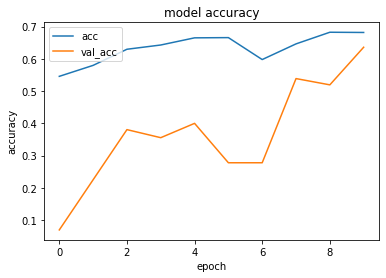

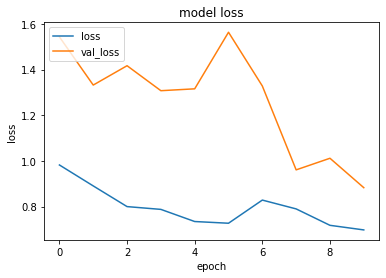

In [18]:
# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [10]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

number_of_data = 300
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [11]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 1.2698 - accuracy: 0.4633
test_loss: 1.2698076963424683
test_accuracy: 0.4633333384990692


In [12]:
# 아직 정확도가 많이 낮으므로 파라미터를 조정하지 않은 상태로 한 번 더 진행해보도록 한다.

n_channel_1=16
n_channel_2=32
n_dense=38
n_train_epoch=10

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

results = model.fit(x_train, y_train, validation_split=0.2, epochs=n_train_epoch)

Epoch 1/10
45/45 [==============================] - 1s 6ms/step - loss: 0.9825 - accuracy: 0.5458 - val_loss: 1.5431 - val_accuracy: 0.0694
Epoch 2/10
45/45 [==============================] - 0s 3ms/step - loss: 0.8908 - accuracy: 0.5799 - val_loss: 1.3322 - val_accuracy: 0.2250
Epoch 3/10
45/45 [==============================] - 0s 4ms/step - loss: 0.8003 - accuracy: 0.6299 - val_loss: 1.4168 - val_accuracy: 0.3806
Epoch 4/10
45/45 [==============================] - 0s 4ms/step - loss: 0.7881 - accuracy: 0.6431 - val_loss: 1.3075 - val_accuracy: 0.3556
Epoch 5/10
45/45 [==============================] - 0s 3ms/step - loss: 0.7350 - accuracy: 0.6653 - val_loss: 1.3157 - val_accuracy: 0.4000
Epoch 6/10
45/45 [==============================] - 0s 4ms/step - loss: 0.7274 - accuracy: 0.6660 - val_loss: 1.5633 - val_accuracy: 0.2778
Epoch 7/10
45/45 [==============================] - 0s 4ms/step - loss: 0.8288 - accuracy: 0.5979 - val_loss: 1.3281 - val_accuracy: 0.2778
Epoch 8/10
45/45 [==

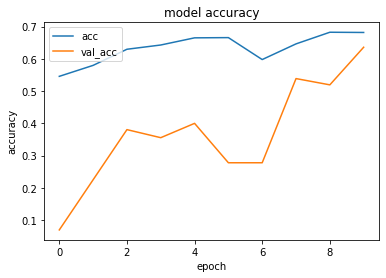

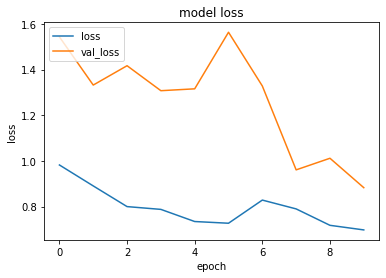

In [17]:
# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [14]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=1)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 [==============================] - 0s 2ms/step - loss: 0.8904 - accuracy: 0.6133
test_loss: 0.8904048800468445
test_accuracy: 0.6133333444595337


model.predict() 결과 :  [0.3524135  0.5042113  0.14337519]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  0


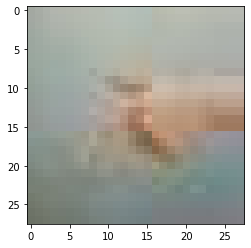

In [15]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [0.23520146 0.14372861 0.62106997]
라벨: 0, 예측결과: 2


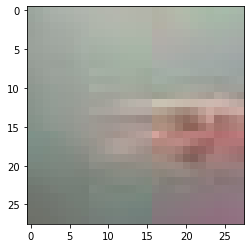

예측확률분포: [0.5629545  0.1858691  0.25117642]
라벨: 1, 예측결과: 0


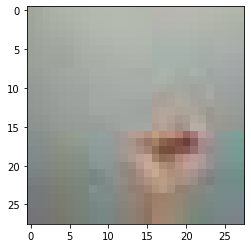

예측확률분포: [0.2731629  0.19112818 0.53570896]
라벨: 1, 예측결과: 2


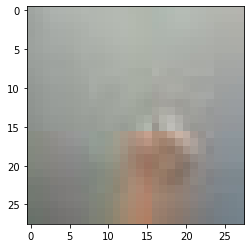

예측확률분포: [0.2745451  0.3809021  0.34455276]
라벨: 2, 예측결과: 1


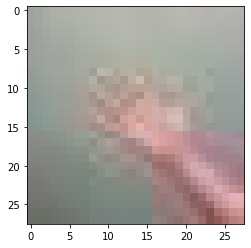

예측확률분포: [0.40136728 0.3196194  0.27901343]
라벨: 1, 예측결과: 0


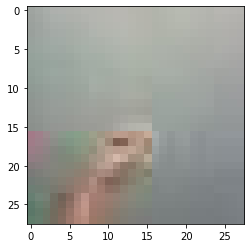

In [16]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()